#Tabular Data - Numeric - Scaled

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Ground_Truth'] = ground_truth
print(df.head())
print(df.tail())

   Feature_1  Feature_2  Ground_Truth
0   2.149014   1.958521             1
1   2.194307   2.456909             1
2   1.929754   1.929759             1
3   2.473764   2.230230             1
4   1.859158   2.162768             1
     Feature_1  Feature_2  Ground_Truth
215  -2.983516   0.177946            -1
216   2.159948  -2.273432            -1
217   0.983124  -3.317220            -1
218  -3.586546   0.250837            -1
219   0.325081   1.099439            -1


In [3]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

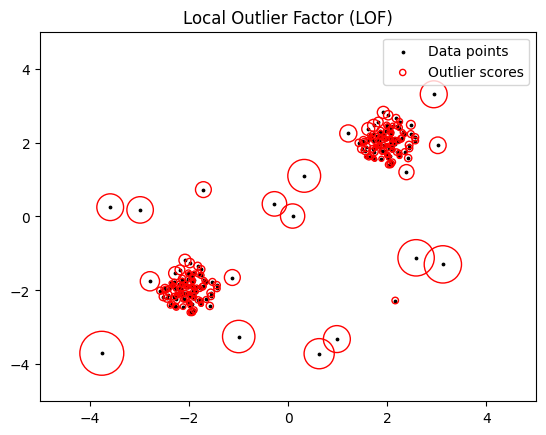

In [4]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

In [5]:
num_detected_outliers = np.sum(y_pred == -1)
percentage_outliers = (num_detected_outliers / len(X)) * 100
print(f"Percentage of outliers detected in the dataset: {percentage_outliers:.2f}%")

Percentage of outliers detected in the dataset: 10.00%


In [6]:
inliers = X[y_pred == 1]
df_inliers = pd.DataFrame(inliers, columns=['Feature_1', 'Feature_2'])

In [7]:
clf_inliers = LocalOutlierFactor(n_neighbors=5)
y_pred_inliers = clf_inliers.fit_predict(inliers)
X_scores_inliers = clf_inliers.negative_outlier_factor_

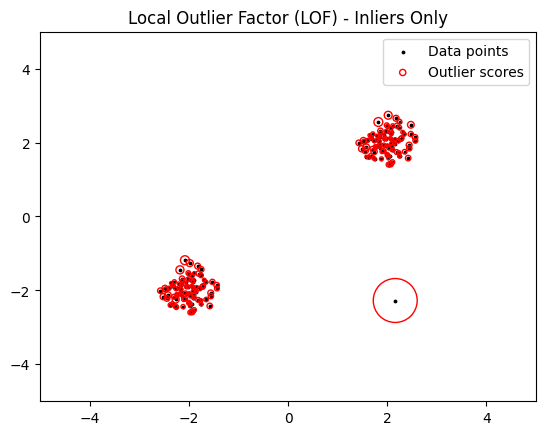

In [8]:
def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

plt.scatter(inliers[:, 0], inliers[:, 1], color="k", s=3.0, label="Data points")
radius_inliers = (X_scores_inliers.max() - X_scores_inliers) / (X_scores_inliers.max() - X_scores_inliers.min())
scatter_inliers = plt.scatter(
    inliers[:, 0],
    inliers[:, 1],
    s=1000 * radius_inliers,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    handler_map={scatter_inliers: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF) - Inliers Only")
plt.show()

In [9]:
num_detected_outliers_filtered = np.sum(y_pred_inliers == -1)
percentage_outliers_filtered = (num_detected_outliers_filtered / len(inliers)) * 100
print(f"Percentage of outliers in the new filtered dataset: {percentage_outliers_filtered:.2f}%")

Percentage of outliers in the new filtered dataset: 1.52%


In [10]:
comparison_table = pd.DataFrame({
    'Metric': ['Number of data points', 'Number of outliers detected', 'Percentage of outliers detected'],
    'Initial Dataset': [len(X), num_detected_outliers, percentage_outliers],
    'Filtered Dataset': [len(inliers), num_detected_outliers_filtered, percentage_outliers_filtered]
})

print("Comparison of Outlier Detection Metrics")
print(comparison_table)

Comparison of Outlier Detection Metrics
                            Metric  Initial Dataset  Filtered Dataset
0            Number of data points            220.0        198.000000
1      Number of outliers detected             22.0          3.000000
2  Percentage of outliers detected             10.0          1.515152


#Numeric Data without contamination - LOF - non scaled

In [15]:
np.random.seed(42)
cluster1 = np.random.normal(loc=0, scale=1, size=(50, 10))
cluster2 = np.random.normal(loc=5, scale=1, size=(50, 10))
data = np.vstack((cluster1, cluster2))

In [16]:
df = pd.DataFrame(data, columns=[f'feature_{i}' for i in (range(10))])
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040
...,...,...,...,...,...,...,...,...,...,...
95,4.758764,5.352055,3.748461,6.443765,4.917849,6.117296,5.342725,5.456753,5.569767,5.447709
96,5.642723,6.329153,5.196521,5.709004,4.910264,6.440117,4.323608,6.800940,4.959842,3.569225
97,5.128104,4.318948,5.840644,4.347376,4.553817,3.110459,4.547694,2.576121,3.416097,5.760415
98,5.785800,5.425458,4.033024,4.952289,4.996397,3.841635,6.503398,5.877362,4.779036,5.026886


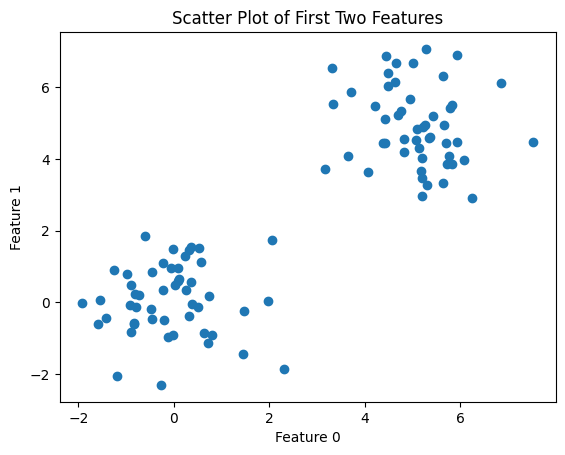

In [17]:
plt.scatter(df['feature_0'], df['feature_1'])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of First Two Features')
plt.show()

In [18]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
outliers = lof.fit_predict(df)
lof_scores = -lof.negative_outlier_factor_

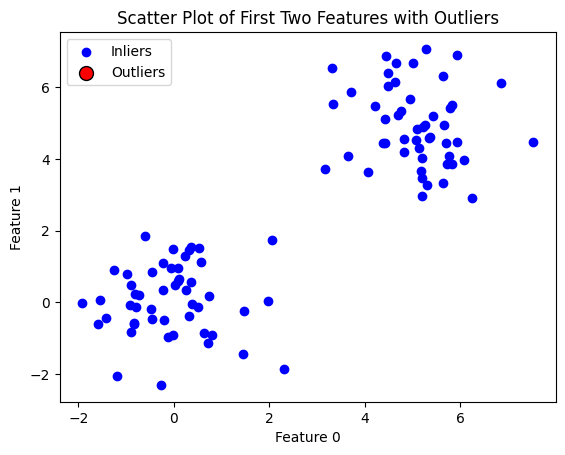

In [19]:
lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(df)
outlier_mask = outliers == -1
inlier_mask = outliers != -1
plt.scatter(df.loc[inlier_mask, 'feature_0'], df.loc[inlier_mask, 'feature_1'], label='Inliers', c='blue')
plt.scatter(df.loc[outlier_mask, 'feature_0'], df.loc[outlier_mask, 'feature_1'], label='Outliers', c='red', edgecolor='k', s=100)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of First Two Features with Outliers')
plt.legend()
plt.show()

In [20]:
num_outliers = int(0.4 * df.shape[0])
outliers = np.random.uniform(low=-10, high=15, size=(num_outliers, 10))

In [21]:
data_with_outliers = np.vstack((data, outliers))
df_with_outliers = pd.DataFrame(data_with_outliers, columns=[f'feature_{i}' for i in range(10)])

In [22]:
lof = LocalOutlierFactor(n_neighbors=20)
outliers_prediction = lof.fit_predict(df_with_outliers)

In [23]:
outlier_mask = outliers_prediction == -1
inlier_mask = outliers_prediction != -1

In [24]:
percent_outliers_detected = (outlier_mask.sum() / df_with_outliers.shape[0]) * 100

In [25]:
print(f"Percentage of outliers detected by LOF: {percent_outliers_detected:.2f}%")

Percentage of outliers detected by LOF: 28.57%


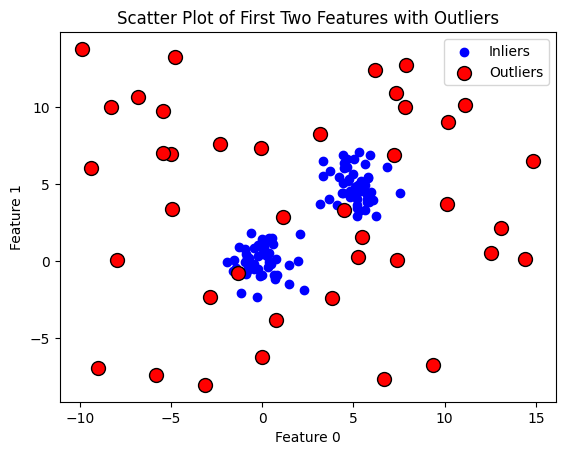

In [26]:
plt.scatter(df_with_outliers.loc[inlier_mask, 'feature_0'], df_with_outliers.loc[inlier_mask, 'feature_1'], label='Inliers', c='blue')
plt.scatter(df_with_outliers.loc[outlier_mask, 'feature_0'], df_with_outliers.loc[outlier_mask, 'feature_1'], label='Outliers', c='red', edgecolor='k', s=100)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of First Two Features with Outliers')
plt.legend()
plt.show()

In [27]:
filtered_data = df_with_outliers.loc[inlier_mask]

In [28]:
lof = LocalOutlierFactor(n_neighbors=20)
outliers_prediction = lof.fit_predict(filtered_data)

In [29]:
outlier_mask = outliers_prediction == -1
inlier_mask = outliers_prediction != -1

In [30]:
percent_outliers_detected = (outlier_mask.sum() / df_with_outliers.shape[0]) * 100

In [31]:
print(f"Percentage of outliers detected in the filtered data by LOF: {percent_outliers_detected:.2f}%")

Percentage of outliers detected in the filtered data by LOF: 0.00%


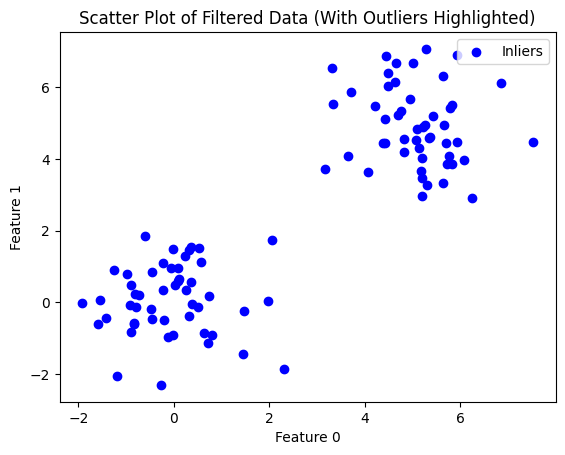

In [33]:
plt.scatter(filtered_data['feature_0'], filtered_data['feature_1'], label='Inliers', c='blue')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of Filtered Data (With Outliers Highlighted)')
plt.legend()
plt.show()